Score = 0.78468
Rank = 2195/14157

In [ ]:
!pip install dython

In [220]:
from dython import nominal
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder

In [188]:
df = pd.read_csv('train.csv')

In [189]:
df = df.drop(['Name', 'PassengerId'], axis=1)

In [226]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


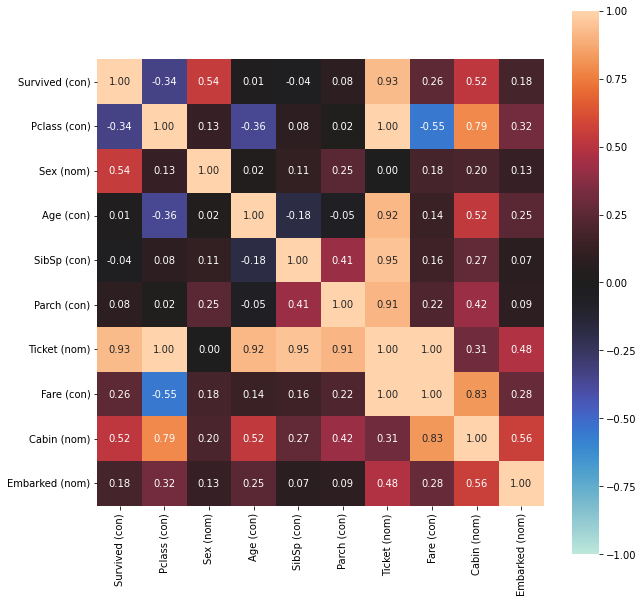

{'ax': <AxesSubplot:>,
 'corr':                 Survived (con)  Pclass (con)  ...  Cabin (nom)  Embarked (nom)
 Survived (con)        1.000000     -0.338481  ...     0.520076        0.182484
 Pclass (con)         -0.338481      1.000000  ...     0.785288        0.316245
 Sex (nom)             0.543351      0.131900  ...     0.198041        0.125467
 Age (con)             0.010539     -0.361353  ...     0.524194        0.249060
 SibSp (con)          -0.035322      0.083081  ...     0.265690        0.073556
 Parch (con)           0.081629      0.018443  ...     0.421113        0.087934
 Ticket (nom)          0.927549      1.000000  ...     0.310649        0.483554
 Fare (con)            0.257307     -0.549500  ...     0.827625        0.284937
 Cabin (nom)           0.520076      0.785288  ...     1.000000        0.558961
 Embarked (nom)        0.182484      0.316245  ...     0.558961        1.000000
 
 [10 rows x 10 columns]}

In [190]:
nominal.associations(df, figsize=(10,10), mark_columns=True)

<AxesSubplot:>

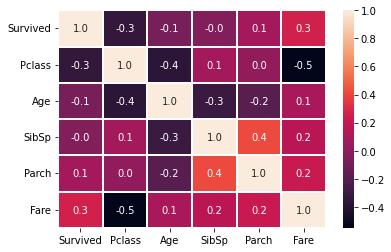

In [17]:
sns.heatmap(df.corr(), linewidths=1.5, fmt='.1f', annot=True)

In [191]:
df = df.drop(['Ticket', 'Cabin'], axis=1)

In [192]:
X = df.drop(['Survived'], axis=1)
y = df.Survived

In [193]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [197]:
cat_features = ['Sex', 'Embarked']
num_features = list(set(X.columns) - set(cat_features))

In [198]:
num_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
  ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent', missing_values=np.nan)),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
  ('num', num_transformer, num_features), ('cat', cat_transformer, cat_features)
])

In [230]:
A = RandomForestClassifier()
A.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Usando RandomForest

In [199]:
pipeRF = Pipeline(steps=[
    ('pre', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf=1, random_state=0))
])

pipeRF.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Fare', 'SibSp',
                                                   'Age', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))

In [200]:
print(cross_val_score(pipeRF, X, y, cv=5, scoring='accuracy').mean())

0.8181846713953927


In [216]:
grid_param =[{
  "rf__n_estimators": [100, 120, 150, 200, 250],
  "rf__max_depth": [3, 5, 7, 11, 13, None],
  'rf__max_features': ['auto', 'sqrt'],
  "rf__min_samples_leaf": [1, 2, 3, 5]
}]
gridsearch = GridSearchCV(pipeRF, param_grid=grid_param, scoring='accuracy', cv=5)
best_model = gridsearch.fit(X_train,y_train)

In [128]:
best_model.best_params_

{'rf__max_depth': 11,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 2,
 'rf__n_estimators': 150}

In [217]:
TheBestRF = best_model.best_estimator_

In [233]:
Score = cross_val_score(TheBestRF, X, y, cv=5, scoring='accuracy')
print(Score.mean())

0.8260561170045821


## Resultado

In [231]:
dfTeste = pd.read_csv('test.csv')

In [232]:
dfTeste.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [234]:
dfPred = dfTeste.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1)

In [235]:
Result = TheBestRF.predict(dfPred)

In [236]:
dfTeste['Survived'] = Result

In [208]:
dfTeste.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [241]:
unwantedCols = list(set(dfTeste.columns)-set(['PassengerId', 'Survived']))
Ans = dfTeste.drop(unwantedCols, axis=1)

In [243]:
Ans

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [242]:
Ans.to_csv('ANSWERS.csv', index=False)